# Segmenting and Clustering Neighborhoods in Toronto - Assignment Week3

## Dear classmates, to evaluate my Project, please run it in a Jupyter environment. Within GitHub browser view, the complete content is not being shown/run.

## In order to do that, please download this notebook to your computer and upload it in your preferred IDE (I used cognitiveclass).

## HINT! If you have a local GitHub repository in you HD, you can get it from there once downloaded.

In [6]:
pip install beautifulsoup4

     |████████████████████████████████| 102kB 2.9MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install lxml #used in the Tutorial

     |████████████████████████████████| 5.8MB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install html5lib #only for reference - it wasn't used in the Tutorial on Youtube

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### Let's start by scrapping Wikipedia website and transforming it into a pandas data frame, then working on the data frame:

In [11]:
#extract the HTML content of the website
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":906439794,"wgRevisionId":906439794,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",

In [12]:
#transforming the HTML in a Pandas Dataframe
table = soup.find('table', {'class':'wikitable sortable'})
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td]
    if row:
        res.append(row)
        
df = pd.DataFrame(res, columns=["PostalCode", "Borough", "Neighborhood"])
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [13]:
#original number of rows
df.shape

(288, 3)

In [14]:
#Drop all the 'Not assigned' in 'Borough' column --> I used the math's complement theory 
mask = df['Borough'].isin(['Not assigned'])
bor_clean = df[~mask]
bor_clean.reset_index(drop=True, inplace=True)
bor_clean.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [15]:
#number of rows after eliminating the 'not assigned' values in 'Borough' 
bor_clean.shape

(211, 3)

In [16]:
#check if some 'Neighborhood' has a 'Not assigned'
print(bor_clean[bor_clean['Neighborhood']=='Not assigned'])

  PostalCode       Borough  Neighborhood
6        M7A  Queen's Park  Not assigned


In [17]:
#replace the 'Not assigned' in the 'Neighborhood' column with the same value as the 'Borough' column
#in the documentation page it says this is a bad practice
bor_clean.loc[bor_clean['Neighborhood'] == ('Not assigned'), 'Neighborhood'] = bor_clean['Borough']

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
bor_clean.head(10)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [19]:
#check if the bad practice led to a good result lol
bor_clean[bor_clean['PostalCode'].str.match('M7A')]

,PostalCode,Borough,Neighborhood
6,M7A,Queen's Park,Queen's Park


In [20]:
#merge cells containing the same PostalCode
toronto = bor_clean.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
toronto.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [21]:
#just checking if the PostalCode M5A has the same Neighborhoods as displayed in Coursera 'My submission'
toronto[toronto['PostalCode'].str.match('M5A')]

,PostalCode,Borough,Neighborhood
53,M5A,Downtown Toronto,"Harbourfront, Regent Park"


## Question 1: check the final shape of the data frame:

In [22]:
#display final number of rows in the dataframe:
toronto.shape

(103, 3)

## Question 2: get the coordinates for all Boroughs in Toronto

In [23]:
pip install geopy

     |████████████████████████████████| 102kB 1.1MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install geocoder

     |████████████████████████████████| 102kB 994kB/s ta 0:00:01
     |████████████████████████████████| 829kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 24.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future


In [25]:
import geocoder # import geocoder

In [26]:
# define the dataframe columns
column_names = ['PostalCode','Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

#empty dataframe
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude


In [27]:
lastvalue = toronto.shape[0]

n = 0

while(n<lastvalue) : 
    postal_code = toronto['PostalCode'][n]
    borough = toronto['Borough'][n]
    neighborhood_name = toronto['Neighborhood'][n]
    #while(lat_lng_coords is None) :
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
    lat_lng_coords = g.latlng
    neighborhood_lat = lat_lng_coords[0]
    neighborhood_lon = lat_lng_coords[1]
   # print(n, greg, lat_lng_coords, borough, neighborhood_name, neighborhood_lat, neighborhood_lon)
    
    neighborhoods = neighborhoods.append({'PostalCode': postal_code,
                                          'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon},ignore_index=True)
    
    n = n+1

In [28]:
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256
3,M1G,Scarborough,Woburn,43.768359,-79.217590
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440


In [29]:
neighborhoods.shape

(103, 5)

In [30]:
neighborhoods.Borough.unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

## Question 3: explore and cluster the neighborhoods in Toronto

### Let's take a look at all the neighborhoods in Toronto in a beautiful map

In [31]:
from geopy.geocoders import Nominatim
import folium

In [32]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [33]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Foursquare API to explore the neighborhoods in Toronto

In [34]:
CLIENT_ID = 'Q0ITL1ZB5Z2J554VCKJTHJOYKXGHHHRISFOGDPJ4PFGE0FHG' # your Foursquare ID
CLIENT_SECRET = 'NWBZLOFJQ41XMF5V5FNXPSZSJGUNZALLSEOUFUTO3DWMV2IM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q0ITL1ZB5Z2J554VCKJTHJOYKXGHHHRISFOGDPJ4PFGE0FHG
CLIENT_SECRET:NWBZLOFJQ41XMF5V5FNXPSZSJGUNZALLSEOUFUTO3DWMV2IM


In [35]:
LIMIT2 = 10000
radius2 = 1000
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius2, LIMIT2)
url2

'https://api.foursquare.com/v2/venues/explore?client_id=Q0ITL1ZB5Z2J554VCKJTHJOYKXGHHHRISFOGDPJ4PFGE0FHG&client_secret=NWBZLOFJQ41XMF5V5FNXPSZSJGUNZALLSEOUFUTO3DWMV2IM&ll=43.653963,-79.387207&v=20180605&radius=1000&limit=10000'

In [36]:
radius = 1000
LIMIT=1000

## Question 3: explore and cluster the neighborhoods in Toronto

### Explore the whole city of Toronto and its Boroughs

In [37]:
def getNearbyVenues_ari(names, postalcodes, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, postalCode, lat, lng in zip(names, postalcodes, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            postalCode,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                             'PostalCode',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
#eu troquei pd.neighborhoods por pd.explore_toronto pra tentar entender a clusterização
toronto_venues = getNearbyVenues_ari(names=neighborhoods['Borough'],
                                  postalcodes=neighborhoods['PostalCode'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
East York
East York
East Toronto
East York
East York
East York
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
North York
York
York
Downtown Toronto
Wes

In [39]:
print(toronto_venues.shape)
toronto_venues.head()

(2464, 8)


,Borough,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,M1B,43.811525,-79.195517,Canadian Appliance Source Whitby,43.808353,-79.191331,Home Service
1,Scarborough,M1C,43.785730,-79.158750,Royal Canadian Legion,43.782533,-79.163085,Bar
2,Scarborough,M1E,43.765690,-79.175256,Canadian Carpet Cleaning and Janitorial Service,43.767731,-79.174240,Dry Cleaner
3,Scarborough,M1E,43.765690,-79.175256,Homestead Roofing Repair,43.765140,-79.178663,Construction & Landscaping
4,Scarborough,M1E,43.765690,-79.175256,Heron Park Community Centre,43.768867,-79.176958,Gym / Fitness Center


In [40]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 262 uniques categories.


In [41]:
toronto_venues.groupby('Borough').count()

,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,
Central Toronto,81,81,81,81,81,81,81
Downtown Toronto,1246,1246,1246,1246,1246,1246,1246
East Toronto,177,177,177,177,177,177,177
East York,76,76,76,76,76,76,76
Etobicoke,86,86,86,86,86,86,86
Mississauga,100,100,100,100,100,100,100
North York,274,274,274,274,274,274,274
Queen's Park,53,53,53,53,53,53,53
Scarborough,93,93,93,93,93,93,93


### One hote encoding

In [42]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# ver se faz sentido trocar Borough por PostalCode para fazer a analise (?)
toronto_onehot['Borough'] = toronto_venues['Borough']
 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

pd.set_option('display.max_columns', None)
toronto_onehot.head()

,Borough,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Scarborough,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

##### Working on the data: there are some columns with very similar names, such as 'Café' and 'Coffee Shop'. For those columns I will merge them and drop, so instead of two, we will have only one column named, for example, 'Café & Shop'

In [43]:
toronto_onehot['Café & Shop'] = toronto_onehot['Café'] + toronto_onehot['Coffee Shop']
toronto_onehot['Pizza & Italian Restaurant'] = toronto_onehot['Pizza Place'] + toronto_onehot['Italian Restaurant']
toronto_onehot.drop(['Café', 'Coffee Shop', 'Pizza Place', 'Italian Restaurant'], axis=1, inplace=True)
toronto_onehot.head()

,Borough,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Café & Shop,Pizza & Italian Restaurant
0,Scarborough,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [44]:
toronto_onehot.shape

(2464, 261)

In [45]:
#group the postalcodes and append the column Borough
toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()
#toronto_grouped['Borough']=toronto['Borough']
toronto_grouped.head()

,Borough,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Café & Shop,Pizza & Italian Restaurant
0,Central Toronto,0.000000,0.0,0.012346,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.00000,0.000000,0.012346,0

In [46]:
toronto_grouped.shape

(11, 261)

## Print most commun venues for each Borough

In [47]:
num_top_venues = 5

for borough in toronto_grouped['Borough']:
    print("----"+borough+"----")
    temp = toronto_grouped[toronto_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Toronto----
                        venue  freq
0                 Café & Shop  0.12
1  Pizza & Italian Restaurant  0.09
2                        Park  0.07
3              Sandwich Place  0.06
4                Dessert Shop  0.04


----Downtown Toronto----
                        venue  freq
0                 Café & Shop  0.14
1  Pizza & Italian Restaurant  0.04
2                  Restaurant  0.04
3                      Bakery  0.03
4                       Hotel  0.03


----East Toronto----
                        venue  freq
0                 Café & Shop  0.11
1  Pizza & Italian Restaurant  0.08
2                         Bar  0.04
3         American Restaurant  0.03
4            Sushi Restaurant  0.03


----East York----
                        venue  freq
0                 Café & Shop  0.08
1  Pizza & Italian Restaurant  0.04
2        Fast Food Restaurant  0.04
3         Sporting Goods Shop  0.04
4              Breakfast Spot  0.04


----Etobicoke----
                      

### Let's make a data frame with the 10 most popular venues in each borough

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Café & Shop,Pizza & Italian Restaurant,Park,Sandwich Place,Dessert Shop,Restaurant,Thai Restaurant,Indian Restaurant,Light Rail Station,Liquor Store
1,Downtown Toronto,Café & Shop,Pizza & Italian Restaurant,Restaurant,Hotel,Bakery,Bar,Japanese Restaurant,American Restaurant,Gastropub,Steakhouse
2,East Toronto,Café & Shop,Pizza & Italian Restaurant,Bar,Sushi Restaurant,American Restaurant,Pub,Steakhouse,Thai Restaurant,Hotel,Bakery
3,East York,Café & Shop,Pizza & Italian Restaurant,Sporting Goods Shop,Fast Food Restaurant,Breakfast Spot,Pub,Supermarket,Sports Bar,Bus Line,Sandwich Place
4,Etobicoke,Pizza & Italian Restaurant,Café & Shop,Grocery Store,Sandwich Place,Bank,Park,Middle Eastern Restaurant,Burrito Place,Pharmacy,Gym
5,Mississauga,Café & Shop,Pizza & Italian Restaurant,Bar,Steakhouse,Hotel,American Restaurant,Japanese Restaurant,Sushi Restaurant,Thai Restaurant,Theater
6,North York,Café & Shop,Clothing Store,Fast Food Restaurant,Park,Pizza & Italian Restaurant,Grocery Store,Shopping Mall,Japanese Restaurant,Bakery,Fried Chicken Joint
7,Queen's Park,Café & Shop,Sandwich Place,Pizza & Italian Restaurant,Indian Restaurant,Bubble Tea Shop,Smoothie Shop,Burrito Place,Falafel Restaurant,Salad Place,Gastropub
8,Scarborough,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store
9,West Toronto,Café & Shop,Pizza & Italian Restaurant,Restaurant,Bakery,Bar,Park,Furniture / Home Store,Gift Shop,Sandwich Place,Cocktail Bar


### And the clusters begin!

In [50]:
from sklearn.cluster import KMeans

In [51]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 2, 1, 2, 0, 2, 1], dtype=int32)

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517,2,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750,2,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256,2,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store
3,M1G,Scarborough,Woburn,43.768359,-79.217590,2,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440,2,Café & Shop,Pharmacy,Chinese Restaurant,Park,Bakery,Fast Food Restaurant,Discount Store,Shopping Mall,Pizza & Italian Restaurant,Department Store


In [53]:
import matplotlib.cm as cm
import matplotlib.colors as colors

### Create a map from the clusters

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

### Shape of the clusters

In [55]:
A2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
#A2
A2.shape

(58, 12)

In [56]:
A1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
#A1
A1.shape

(39, 12)

In [57]:
A3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
#A3
A3.shape

(5, 12)

In [58]:
A0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
#A0
A0.shape

(1, 12)

### Most commum venues for each cluster

In [59]:
import matplotlib.pyplot as plt
from matplotlib import cm

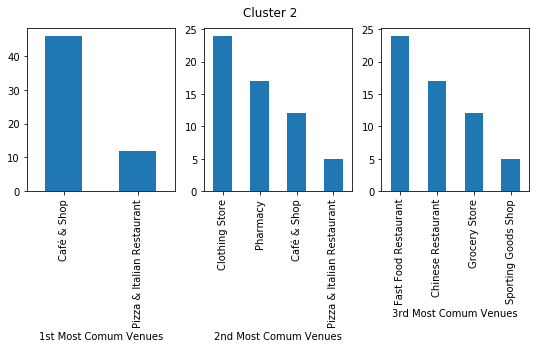

In [60]:
plt.figure(figsize=(9, 3))

plt.suptitle('Cluster 2')
plt.subplot(131)
plt.xlabel('1st Most Comum Venues')
A2['1st Most Common Venue'].value_counts()[:3].plot(kind='bar')
plt.subplot(132)
plt.xlabel('2nd Most Comum Venues')
A2['2nd Most Common Venue'].value_counts()[:5].plot(kind='bar')
plt.subplot(133)
plt.xlabel('3rd Most Comum Venues')
A2['3rd Most Common Venue'].value_counts()[:4].plot(kind='bar')

plt.show()

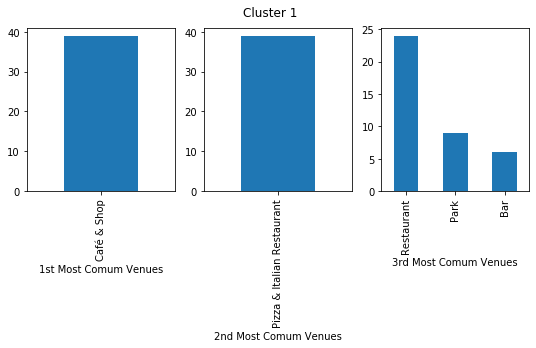

In [61]:
plt.figure(figsize=(9, 3))

plt.suptitle('Cluster 1')
plt.subplot(131)
plt.xlabel('1st Most Comum Venues')
A1['1st Most Common Venue'].value_counts()[:3].plot(kind='bar')
plt.subplot(132)
plt.xlabel('2nd Most Comum Venues')
A1['2nd Most Common Venue'].value_counts()[:5].plot(kind='bar')
plt.subplot(133)
plt.xlabel('3rd Most Comum Venues')
A1['3rd Most Common Venue'].value_counts()[:4].plot(kind='bar')

plt.show()

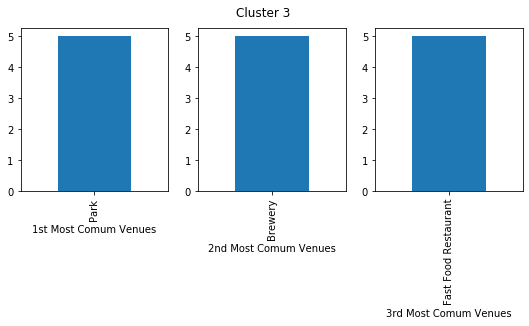

In [62]:
plt.figure(figsize=(9, 3))

plt.suptitle('Cluster 3')
plt.subplot(131)
plt.xlabel('1st Most Comum Venues')
A3['1st Most Common Venue'].value_counts()[:3].plot(kind='bar')
plt.subplot(132)
plt.xlabel('2nd Most Comum Venues')
A3['2nd Most Common Venue'].value_counts()[:5].plot(kind='bar')
plt.subplot(133)
plt.xlabel('3rd Most Comum Venues')
A3['3rd Most Common Venue'].value_counts()[:4].plot(kind='bar')


plt.show()

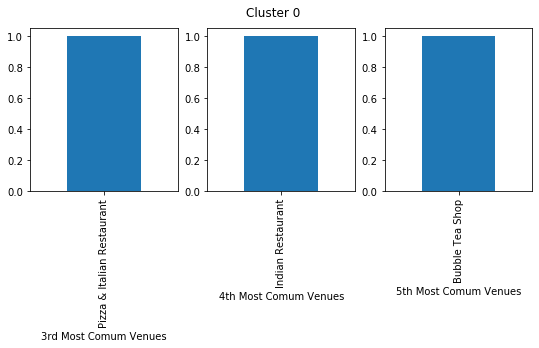

In [63]:
plt.figure(figsize=(9, 3))

plt.suptitle('Cluster 0')
plt.subplot(131)
plt.xlabel('3rd Most Comum Venues')
A0['3rd Most Common Venue'].value_counts()[:3].plot(kind='bar')
plt.subplot(132)
plt.xlabel('4th Most Comum Venues')
A0['4th Most Common Venue'].value_counts()[:5].plot(kind='bar')
plt.subplot(133)
plt.xlabel('5th Most Comum Venues')
A0['5th Most Common Venue'].value_counts()[:4].plot(kind='bar')

plt.show()

### Cluster profiles

#### Toronto seems to be a gastronomic trip destination with lots of Cafés and Restaurants. I also put the clusters in order of children number.

Comparing the clusters, we could name:

CLuster 2: Shopping clothing, explore chinese cuisine and by groceries to make a special meal

CLuster 1: Italian, Café and other restaurants

CLuster 3: Parks

CLuster 0: Indian and Tea 